In [ ]:
#importing the libraries
import tensorflow as tf
import numpy as np
import pandas as pd
import json
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, Input, LSTM, Dense, GlobalMaxPooling1D, Flatten
from tensorflow.keras.models import Model
import matplotlib.pyplot as plts

In [2]:
# prompt: write a greeting intent writefile content.json
%%writefile content.json
{
  "intents": [
    {
      "tag": "greeting",
      "patterns": [
        "Hi",
        "Hey",
        "Hello",
        "Good morning",
        "Good afternoon",
        "Good evening",
        "How's it going?",
        "What's up"
      ],
      "responses": [
        "Hey there!",
        "Hello!",
        "How can I help you?",
        "Good to see you!",
        "Hi there, how can I assist you today?"
      ]
    },
    {
      "tag": "feeling",
      "patterns": [
        "How are you?",
        "How are you doing?",
        "How's life?",
        "How have you been?",
        "Are you okay?",
        "What's new?"
      ],
      "responses": [
        "I'm doing great, thank you!",
        "All systems are running smoothly!",
        "I'm just a bot, but thanks for asking!",
        "Feeling fantastic!"
      ]
    },
    {
      "tag": "goodbye",
      "patterns": [
        "Bye",
        "Goodbye",
        "See you later",
        "I'm leaving",
        "Catch you later",
        "Farewell"
      ],
      "responses": [
        "Goodbye! Have a great day!",
        "See you later!",
        "Take care!",
        "Farewell, until next time!"
      ]
    },
    {
      "tag": "thanks",
      "patterns": [
        "Thanks",
        "Thank you",
        "Much appreciated",
        "Thanks a lot",
        "Cheers",
        "Thank you very much"
      ],
      "responses": [
        "You're welcome!",
        "No problem at all!",
        "Glad I could help!",
        "Anytime!"
      ]
    }
  ]
}


Overwriting content.json


In [3]:
with open('content.json') as content:
    data1 = json.load(content)

In [4]:
#getting all the data to lists
# Assuming 'data1' is already defined and contains your intents data
tags = []
pattern = []
responses = {}  # Initialize as an empty dictionary

for intent in data1['intents']:
    responses[intent['tag']] = intent['responses']  # Map tags to their responses
    for lines in intent['patterns']:
        pattern.append(lines)  # Add patterns to the list
        tags.append(intent['tag'])  # Add corresponding tags


In [5]:
#converting to dataframe
data = pd.DataFrame({"patterns":pattern,
                     "tag":tags})




In [6]:
#printing the data
data

,patterns,tag
0,Hi,greeting
1,Hey,greeting
2,Hello,greeting
3,Good morning,greeting
4,Good afternoon,greeting
5,Good evening,greeting
6,How's it going?,greeting
7,What's up,greeting
8,How are you?,feeling
9,How are you doing?,feeling


In [7]:
#removing punctuations
import string
data['patterns'] = data['patterns'].apply(lambda wrd:[ltrs.lower() for ltrs in wrd if ltrs not in string.punctuation])
data['patterns'] = data['patterns'].apply(lambda wrd: ''.join(wrd))

In [8]:
data

,patterns,tag
0,hi,greeting
1,hey,greeting
2,hello,greeting
3,good morning,greeting
4,good afternoon,greeting
5,good evening,greeting
6,hows it going,greeting
7,whats up,greeting
8,how are you,feeling
9,how are you doing,feeling


In [9]:
#tokenize the data
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['patterns'])
train = tokenizer.texts_to_sequences(data['patterns'])
#apply padding
from tensorflow.keras.preprocessing.sequence import pad_sequences
x_train = pad_sequences(train)

#encoding the outputs
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(data['tag'])

In [10]:
input_shape = x_train.shape[1]
print(input_shape)

#define vocabulary
vocabulary = len(tokenizer.word_index)
print("number of unique words : ", vocabulary)
output_length = le.classes_.shape[0]
print("output length: ", output_length)

4
number of unique words :  37
output length:  4


In [11]:
#creating model important RNN, CNN , LSTM, transformers
num_classes = len(le.classes_)  # Number of unique tags
i = Input(shape=(input_shape,))  # Corrected input layer definition
x = Embedding(input_dim=vocabulary + 1, output_dim=10)(i)  # Embedding layer
x = LSTM(10, return_sequences=True)(x)  # LSTM layer with return_sequences=True
x = Flatten()(x)  # Flattening the output of LSTM
x = Dense(10, activation="relu")(x)  # Fully connected layer with ReLU activation
x = Dense(10, activation="softmax")(x)  # Output layer with softmax activation

# Build the model
model = Model(i, x)


In [12]:
#compiling the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
#training the model
train = model.fit(x_train, y_train, epochs=200)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.0000e+00 - loss: 2.3035
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.1154 - loss: 2.3006
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5000 - loss: 2.2981
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.5000 - loss: 2.2953
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.5000 - loss: 2.2924
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.4615 - loss: 2.2895
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.4615 - loss: 2.2864
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 133ms/step - accuracy: 0.4231 - loss: 2.2833
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step - accuracy: 0.4231 - loss: 2.2801
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.4231 - loss: 2.2768
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.4615 - loss: 2.2734
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step - accuracy

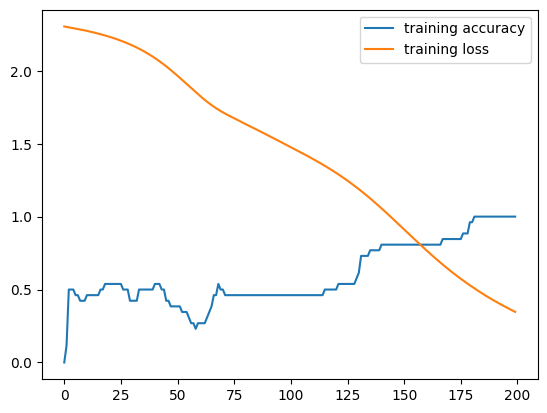

In [14]:
#plotting model accuracy
plts.plot(train.history['accuracy'], label='training accuracy')
plts.plot(train.history['loss'], label='training loss')
plts.legend()

In [ ]:
# Testing the model - Bot Chat
import random
import string

while True:
    texts_p = []
    prediction_input = input("You: ")

    # Removing punctuation and converting to lowercase
    prediction_input = [letters.lower() for letters in prediction_input if letters not in string.punctuation]
    prediction_input = ''.join(prediction_input)
    texts_p.append(prediction_input)

    # Tokenizing and padding
    prediction_input = tokenizer.texts_to_sequences(texts_p)
    prediction_input = np.array(prediction_input).reshape(-1)
    prediction_input = pad_sequences([prediction_input], maxlen=input_shape)  # Fixed padding length

    # Getting output from model
    output = model.predict(prediction_input)
    output = output.argmax()

    # Validating and finding the right tag
    if output >= len(le.classes_):
        print("Bot: Sorry, I didn't understand that.")
        continue

    response_tag = le.inverse_transform([output])[0]
    print("Bot:", random.choice(responses[response_tag]))

    if response_tag == "goodbye":
        print("Bot: Goodbye!")
        break


You: hi
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Bot: Hello!
You: how are you
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Bot: I'm just a bot, but thanks for asking!
